## Introduction to Neural Networks

Neural networks are a class of machine learning algorithms inspired by the structure and functioning of the human brain. They are designed to recognize patterns and relationships in data by mimicking the way biological neurons transmit signals. Neural networks have become a cornerstone of modern artificial intelligence (AI), powering applications such as image recognition, natural language processing, and autonomous systems.

### Linear and Non-Linear Classification Problems  
- **Linear classification**:  
  - Data can be separated by a straight line or hyperplane.  
  - Example: Determining if an email is spam or not based on word counts.  
- **Non-linear classification**:  
  - Requires complex boundaries (e.g., curves) to separate classes.  
  - Example: Classifying flowers based on features like petal width and length when relationships are not linear.  
- **Key point**: Understanding the nature of the problem helps select the appropriate model (e.g., linear models for simpler tasks, neural networks for complex ones).

---

### Dimensionality and Classes in Classification Problems  
- **Features (dimensions)**:  
  - A 2D classification involves two features, like weight and height.  
  - High-dimensional problems use more features, such as hundreds in image recognition.  
- **Classes**:  
  - Binary classification: Two classes (e.g., spam vs. not spam).  
  - Multi-class classification: Multiple classes (e.g., identifying types of fruit).  
- **Challenges**:  
  - Higher dimensions can lead to computational challenges (curse of dimensionality).  
  - Multi-class problems often require techniques like one-vs-all or softmax.

---



### Key Components of a Perceptron  
- **Definition**:  
  - A perceptron is a single-layer neural network used for binary classification.  
  - It is the building block of more complex neural networks.  
- **Components**:  
  - **Inputs**: Features of the data (e.g., height, weight).  
  - **Weights**: Parameters that adjust the importance of each input.  
  - **Bias**: A constant added to help with decision boundaries.  
  - **Activation function**: Determines the perceptron’s output (e.g., step function).  
  
  <img src="imgs/activation function.png" alt="Perceptron" style="width:550px; height:auto;">
  
- **Importance**:  
  - Understanding perceptrons helps grasp how neurons work in larger networks.  

---

### Logical Operators and Perceptrons  
- **Translation of logic**:  
  - Logical operations like AND, OR, and NOT can be modeled with perceptrons.  
  - Each operation has a specific weight and bias configuration.  
- **Key insights**:  
  - A perceptron can model any logic gate if the boundary is linear.  
  - Example: An AND gate outputs 1 only when both inputs are 1, achieved with appropriate weights and thresholds.  
- **Limitations**:  
  - Non-linear problems, like XOR, require more than one perceptron or additional layers.  

<img src="imgs/And Or.png" alt="Perceptron" style="width:550px; height:auto;">


---


## A General Depiction of a Perceptron

On the left, we have **n** inputs coming in, with values \( x_1 \) to \( x_n \) (and \( 1 \) in the last place). Then we have edges with weights \( W_1 \) to \( W_n \) and \( b \) (for the bias). 

The node takes these inputs and calculates a linear equation:

$$
Wx + b = \sum_{i=1}^{n} W_i X_i + b
$$

The node then checks if the value is greater than or equal to zero, returning a value of **Yes** if it is and **No** if it is not.

<img src="imgs/Perceptron.png" alt="Perceptron" style="width:550px; height:auto;">




An perceptron, also called an Artificial Neuron, is a mathematical function that mimics a biological neuron. It takes multiple inputs, applies weights and biases, and produces an output using an activation function. The process can be summarized as:
\[
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
\]
where:
- \( x_i \): Inputs.
- \( w_i \): Weights applied to the inputs.
- \( b \): Bias term.
- \( f \): Activation function, such as sigmoid or ReLU, which determines the neuron’s output.

<img src="imgs/Perceptron2.png" alt="Perceptron" style="width:550px; height:auto;">

Neural networks get their name from the fact that they are—loosely—modeled after **biological neurons**

<img src="imgs/Perceptron3.png" alt="Perceptron" style="width:550px; height:auto;">

---



### Simple Perceptron Algorithm  
- **Linear boundary implementation**:  
  - A perceptron adjusts weights using input and output differences.  
  - Example: Separating points above and below a line in a 2D space.  
- **Algorithm steps**:  
  - Initialize weights and bias.  
  - For each data point, calculate the weighted sum and apply the activation function.  
  - Adjust weights based on errors.  
- **Applications**:  
  - Solving simple binary classification problems with linear boundaries.


<img src="imgs/perceptron algorithm.png" alt="Perceptron" style="width:550px; height:auto;">

### Perceptron Step Function

Recall that the perceptron step works as follows. For a point with coordinates \((p, q)\), label \(y\), and prediction given by the equation:

$$
\hat{y} = \text{step}(w_1x_1 + w_2x_2 + b)
$$

#### Steps:
1. **If the point is correctly classified:**  
   Do nothing.

2. **If the point is classified as positive, but it has a negative label:**  
   Subtract \(\alpha p\), \(\alpha q\), and \(\alpha\) from \(w_1\), \(w_2\), and \(b\), respectively.

3. **If the point is classified as negative, but it has a positive label:**  
   Add \(\alpha p\), \(\alpha q\), and \(\alpha\) to \(w_1\), \(w_2\), and \(b\), respectively.

---

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Setting the random seed
# Feel free to change it to see different solutions
np.random.seed(42)

def step_function(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return step_function((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
def perceptron_step(X, y, W, b, learn_rate = 0.01):
    n = len(X)
    """
    The function should receive as inputs the data X, the labels y, the
    weights W (as an array), and the bias b, update the weights and bias
    W, b, according to the perceptron algorithm, and return W and b.
    """
    # Fill in code
    for i in range(0, n):
        y_hat = prediction(X[i], W, b)
        if y[i] - y_hat == 1:
            W[0] = W[0] + learn_rate * X[i][0]
            W[1] = W[1] + learn_rate * X[i][1]
            b = b + learn_rate
        elif y[i] - y_hat == -1:
            W[0] = W[0] - learn_rate * X[i][0]
            W[1] = W[1] - learn_rate * X[i][1]
            b = b - learn_rate
    return W, b

# Testing your algorithm code

X_test = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
y_test = np.array([1,1,0,0])
W_test = np.array([[0.5], [0.5]])
b_test = 0.5

output_W, output_b = perceptron_step(
    X_test,
    y_test,
    W_test,
    b_test,
    0.01
)
solution_W = np.array([[ 0.51],[ 0.49]])
solution_b = 0.49
if np.array_equal(output_W, solution_W) and output_b == solution_b:
    print("Nice work coding the perceptron algorithm!")
else:
    print("Try again. For perceptron_step(\n{}, \n{}, \n{}, \n{}, \
\n{}\n)\nthe expected result was \nW=\n{}\nand b={}, but your output \
was \nW=\n{}\nand b={}".format(
        X_test,
        y_test,
        W_test,
        b_test,
        0.01,
        solution_W,
        solution_b,
        output_W,
        output_b
    ))

Nice work coding the perceptron algorithm!


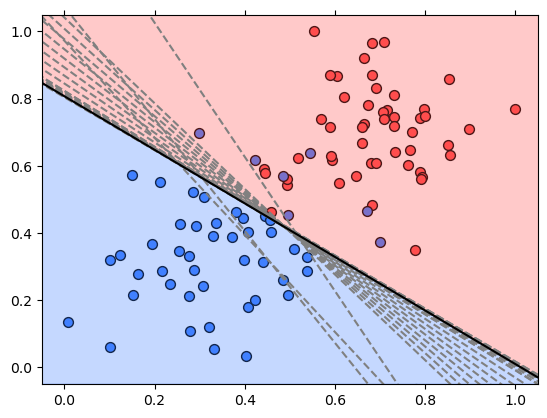

In [22]:
def train_perceptron_algorithm(X, y, learn_rate=0.01, num_epochs=25):
    """
    This function runs the perceptron algorithm repeatedly on the dataset,
    and returns a few of the boundary lines obtained in the iterations,
    for plotting purposes.
    """
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptron_step(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

def plot_line(m, b, linestyle='dashed', color='gray', fill=False):
    """
    Helper function to avoid repetitive code when plotting boundary lines
    """
    x = np.arange(-10.0, 10.0, 0.1)
    plt.plot(x, m*x+b, linestyle=linestyle, color=color)
    if fill:
        plt.fill_between(x, m*x+b, -0.05, color=blue, alpha=0.3)
        plt.fill_between(x, m*x+b, 1.05, color=red, alpha=0.3)
        
# Load data
data = np.asarray(pd.read_csv("data/data.csv", header=None))
X = data[:,0:2]
y = data[:,2]

# Get list of boundary lines
# Feel free to play with the learning rate and the num_epochs, and see
# your results plotted below
boundary_lines = train_perceptron_algorithm(X, y)

# Set up plot styling
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', top='off')

# Plot data points
red = [1,0.3,0.3]
blue = [0.25,0.5,1]
red_points = X[np.argwhere(y==0).flatten()]
blue_points = X[np.argwhere(y==1).flatten()]
plt.scatter(red_points[:,0], red_points[:,1], s=50, color=red, edgecolor='k')
plt.scatter(blue_points[:,0], blue_points[:,1], s=50, color=blue, edgecolor='k')

# Plot boundary lines and solution regions
for line in boundary_lines:
    slope = line[0]
    b = line[1]
    plot_line(slope, b)
solution_slope = boundary_lines[-1][0]
solution_intercept = boundary_lines[-1][1]
plot_line(solution_slope, solution_intercept, 'solid', 'k', True)
plt.show()


---

### Generalizing Perceptrons for Non-Linear Boundaries  
- **Adjustments needed**:  
  - Combine multiple perceptrons in layers to form neural networks.  
  - Introduce non-linear activation functions like or sigmoid.  
- **Concept**:  
  - Each perceptron learns part of the non-linear boundary, and their outputs combine to model complexity.  
- **Example**:  
  - Classifying spirals, which requires a curved decision boundary.

---

### Error Functions and Gradient Descent  
- **Error functions**:  
  - Measure how far predictions are from the actual labels.  
  - Common functions: Mean Squared Error (MSE) or Cross-Entropy Loss.  
- **Gradient descent**:  
  - Iterative algorithm to minimize the error by adjusting weights.  
  - Steps: Calculate gradients, update weights using learning rate.  
- **Importance**:  
  - Fundamental to training perceptrons and neural networks effectively.

---

### Discrete vs. Continuous Predictions  
- **Discrete predictions**:  
  - Outputs are fixed categories (e.g., 0 or 1 for binary classification).  
  - Example: Predicting if an email is spam or not.  
- **Continuous predictions**:  
  - Outputs range between values (e.g., probabilities).  
  - Example: Predicting the likelihood of rain (0.0 to 1.0).  
- **Key tools**:  
  - Sigmoid function for probabilities in binary classification.  
  - Softmax for probabilities in multi-class classification.  
  
<img src="imgs/sigmoid function.png" alt="Perceptron" style="width:550px; height:auto;">
<img src="imgs/Discrete vs Continuous.png" alt="Perceptron" style="width:550px; height:auto;">

---

### Softmax for Multi-Class Classification  
- **Purpose**:  
  - Converts raw scores into probabilities for multiple classes.  
  - Ensures outputs sum to 1 for interpretability.  
- **Usage**:  
  - Common in tasks like image classification (e.g., cat, dog, car).  
- **Benefits**:  
  - Enables comparison across classes using probabilistic outputs.  
- **Implementation**:  
  - Apply exponential function to scores, then normalize by their sum.

---

### One-Hot Encoding for Non-Numerical Data  
- **Purpose**:  
  - Converts categorical data into a numerical format.  
  - Example: "Red, Green, Blue" becomes [1, 0, 0], [0, 1, 0], [0, 0, 1].  
- **Benefits**:  
  - Enables neural networks to process categorical data.  
  - Avoids assigning numerical values that imply order (e.g., 1, 2, 3).  
- **Applications**:  
  - Encoding labels for multi-class classification tasks.

---

### Maximum Likelihood and Cross-Entropy  
- **Maximum likelihood**:  
  - Measures the probability of observed data given the model.  
  - Helps fit the model to maximize the likelihood of correct predictions.  
- **Cross-entropy loss**:  
  - A performance measure for classification tasks.  
  - Penalizes incorrect predictions with a larger loss for high-confidence errors.  
- **Importance**:  
  - Ensures the model predicts accurate probabilities for classes.

---

### Logistic Regression and Gradient Descent  
- **Logistic regression**:  
  - Predicts probabilities for binary outcomes using a sigmoid function.  
  - Models the log-odds of the target as a linear combination of inputs.  
- **Gradient descent**:  
  - Optimizes the model by minimizing the loss function iteratively.  
  - Updates weights in the direction of steepest error reduction.  
- **Applications**:  
  - Baseline models for binary classification problems.

---

### Components of Neural Networks  
- **Key components**:  
  - **Inputs**: Data features.  
  - **Weights**: Parameters to learn relationships.  
  - **Bias**: Adjusts decision thresholds.  
  - **Activation functions**: Introduce non-linearity (e.g., ReLU, sigmoid).  
  - **Layers**: Arrange neurons in structures for complex learning.  
- **Architectures**:  
  - Feedforward: Basic structure, one direction of data flow.  
  - Convolutional: Specialized for images.  
  - Recurrent: Handles sequential data.  

---

### Backpropagation for Weight Optimization  
- **Definition**:  
  - A technique to update weights based on the gradient of the error.  
  - Ensures each layer’s contribution to the error is considered.  
- **Process**:  
  - Calculate forward pass to predict outputs.  
  - Compute error and propagate it backward to update weights.  
- **Benefits**:  
  - Essential for training deep neural networks effectively.  
  - Reduces computational costs compared to naive optimization.  

Would you like any part expanded or clarified further?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Setting the random seed
# Feel free to change it to see different solutions
np.random.seed(42)

def step_function(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return step_function((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
def perceptron_step(X, y, W, b, learn_rate = 0.01):
    n = len(X)
    """
    The function should receive as inputs the data X, the labels y, the
    weights W (as an array), and the bias b, update the weights and bias
    W, b, according to the perceptron algorithm, and return W and b.
    """
    # Fill in code
    for i in range(0, n):
        y_hat = prediction(X[i], W, b)
        if y[i] - y_hat == 1:
            W[0] = W[0] + learn_rate * X[i][0]
            W[1] = W[1] + learn_rate * X[i][1]
            b = b + learn_rate
        elif y[i] - y_hat == -1:
            W[0] = W[0] - learn_rate * X[i][0]
            W[1] = W[1] - learn_rate * X[i][1]
            b = b - learn_rate
    return W, b

# Testing your algorithm code

X_test = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
y_test = np.array([1,1,0,0])
W_test = np.array([[0.5], [0.5]])
b_test = 0.5

output_W, output_b = perceptron_step(
    X_test,
    y_test,
    W_test,
    b_test,
    0.01
)
solution_W = np.array([[ 0.51],[ 0.49]])
solution_b = 0.49
if np.array_equal(output_W, solution_W) and output_b == solution_b:
    print("Nice work coding the perceptron algorithm!")
else:
    print("Try again. For perceptron_step(\n{}, \n{}, \n{}, \n{}, \
\n{}\n)\nthe expected result was \nW=\n{}\nand b={}, but your output \
was \nW=\n{}\nand b={}".format(
        X_test,
        y_test,
        W_test,
        b_test,
        0.01,
        solution_W,
        solution_b,
        output_W,
        output_b
    ))

*
**
***
****
*****
******
